# 1. Get Data

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as py
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [2]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/pesawat.csv')

Mounted at /content/drive


# 2. EDA

## 2.1 Checking Data in General

In [3]:
eda=data.copy()
eda.shape

(103904, 25)

In [4]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
pd.set_option('display.max_columns',None)
eda.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## 2.2 Checking the Amount of Uniq Data of Each Feature

In [6]:
for i in eda.columns:
  print(f"Amount of unique data on feature {i}: {eda[i].nunique()}")

Amount of unique data on feature Unnamed: 0: 103904
Amount of unique data on feature id: 103904
Amount of unique data on feature Gender: 2
Amount of unique data on feature Customer Type: 2
Amount of unique data on feature Age: 75
Amount of unique data on feature Type of Travel: 2
Amount of unique data on feature Class: 3
Amount of unique data on feature Flight Distance: 3802
Amount of unique data on feature Inflight wifi service: 6
Amount of unique data on feature Departure/Arrival time convenient: 6
Amount of unique data on feature Ease of Online booking: 6
Amount of unique data on feature Gate location: 6
Amount of unique data on feature Food and drink: 6
Amount of unique data on feature Online boarding: 6
Amount of unique data on feature Seat comfort: 6
Amount of unique data on feature Inflight entertainment: 6
Amount of unique data on feature On-board service: 6
Amount of unique data on feature Leg room service: 6
Amount of unique data on feature Baggage handling: 5
Amount of uniqu

## 2.3 Checking the Uniq Data of Each Feature

In [7]:
for i in eda.columns:
  print(f"Amount of unique data on feature {i}: {eda[i].unique()}")

Amount of unique data on feature Unnamed: 0: [     0      1      2 ... 103901 103902 103903]
Amount of unique data on feature id: [ 70172   5047 110028 ...  68825  54173  62567]
Amount of unique data on feature Gender: ['Male' 'Female']
Amount of unique data on feature Customer Type: ['Loyal Customer' 'disloyal Customer']
Amount of unique data on feature Age: [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Amount of unique data on feature Type of Travel: ['Personal Travel' 'Business travel']
Amount of unique data on feature Class: ['Eco Plus' 'Business' 'Eco']
Amount of unique data on feature Flight Distance: [ 460  235 1142 ...  974 1479  400]
Amount of unique data on feature Inflight wifi service: [3 2 4 1 5 0]
Amount of unique data on feature Departure/Arrival time convenient: [4 2 5 3 1 0]
Amount of uni

## 2.4 Checking the Null Data

In [8]:
#In Percentage
eda.isnull().sum().sort_values(ascending=False)/len(eda) * 100

Arrival Delay in Minutes             0.298352
Unnamed: 0                           0.000000
Online boarding                      0.000000
Departure Delay in Minutes           0.000000
Cleanliness                          0.000000
Inflight service                     0.000000
Checkin service                      0.000000
Baggage handling                     0.000000
Leg room service                     0.000000
On-board service                     0.000000
Inflight entertainment               0.000000
Seat comfort                         0.000000
Food and drink                       0.000000
id                                   0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
Departure/Arrival time convenient    0.000000
Inflight wifi service                0.000000
Flight Distance                      0.000000
Class                                0.000000
Type of Travel                       0.000000
Age                               

### 2.4.1 Handling the Null Values

In [9]:
eda['Arrival Delay in Minutes'] = eda['Arrival Delay in Minutes'].fillna(eda['Arrival Delay in Minutes'].median())

In [10]:
#In Percentage
eda.isnull().sum().sort_values(ascending=False)/len(eda) * 100

Unnamed: 0                           0.0
Online boarding                      0.0
Arrival Delay in Minutes             0.0
Departure Delay in Minutes           0.0
Cleanliness                          0.0
Inflight service                     0.0
Checkin service                      0.0
Baggage handling                     0.0
Leg room service                     0.0
On-board service                     0.0
Inflight entertainment               0.0
Seat comfort                         0.0
Food and drink                       0.0
id                                   0.0
Gate location                        0.0
Ease of Online booking               0.0
Departure/Arrival time convenient    0.0
Inflight wifi service                0.0
Flight Distance                      0.0
Class                                0.0
Type of Travel                       0.0
Age                                  0.0
Customer Type                        0.0
Gender                               0.0
satisfaction    

## 2.5 Checking Duplicated Data

In [11]:
# Checking duplicated data based on Passenger id
eda.duplicated().sum()

0

## 2.6 Drop unimportant feature

In [12]:
eda.drop(['Unnamed: 0','id'],axis=1,inplace=True)

## 2.7 Short Brief of Distribution Data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

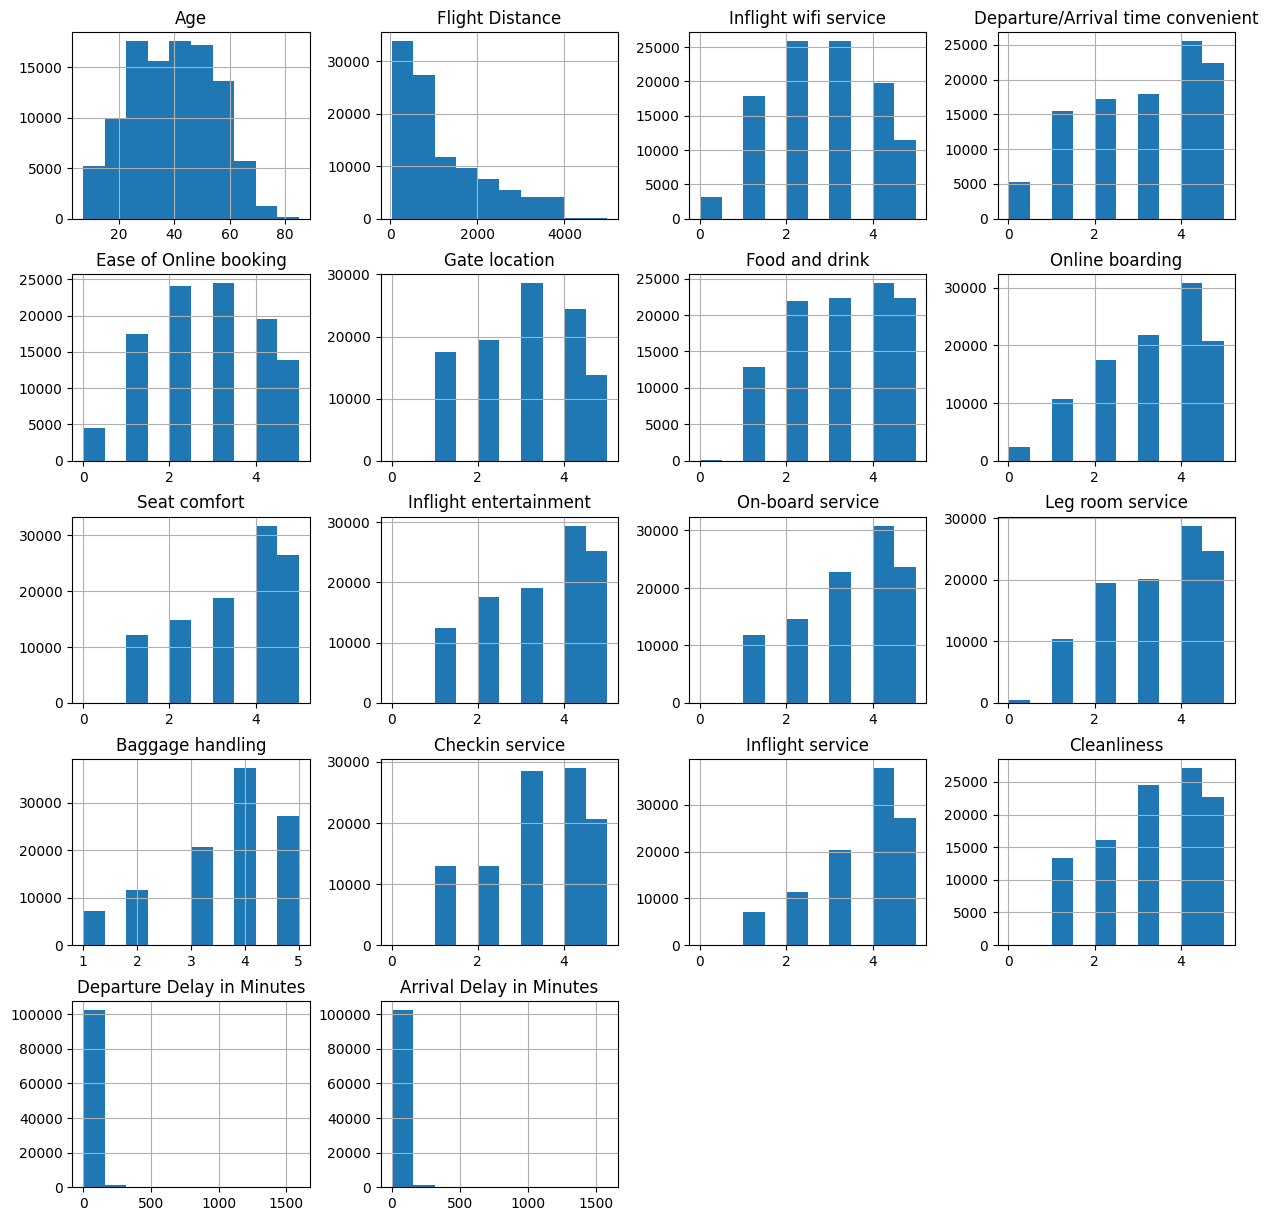

In [13]:
eda.hist(figsize=(15, 15))

## 2.8 Descriptive Statistic of Data [Numeric & Categorical]

In [14]:
# Get the feature name on numeric type data
num = eda.select_dtypes(include=['int64','float64']).columns
num

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
# Get the feature name on categoric type data
cat = eda.select_dtypes(include=['object']).columns
cat

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [16]:
eda[num].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
eda[cat].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## 2.9 Checking Distribution of Target Variable

In [18]:
feat_count = eda.groupby(['satisfaction']).agg({'satisfaction':['count']}).reset_index()
feat_count.columns = ['satisfaction','amount']
feat_count

,satisfaction,amount
0,neutral or dissatisfied,58879
1,satisfied,45025


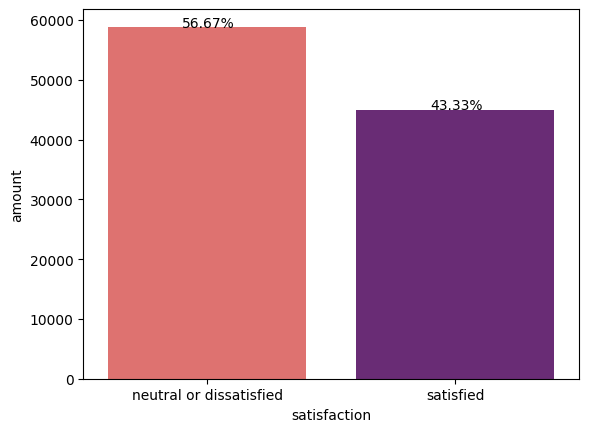

In [19]:
#In Visualization
a = sns.barplot(x='satisfaction', y='amount', data=feat_count, palette='magma_r')

total = float(len(eda))
for p in a.patches:
        percentage = '{:.2f}%'.format((p.get_height()/total)*100)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.6
        a.annotate(percentage, (x, y))

## 2.8 Visualization - Categorical Data

### 2.8.1 Gender towards Satisfaction

In [20]:
b=eda.groupby(['Gender','satisfaction']).agg({'satisfaction':['count']}).reset_index()
b.columns=["gender","satisfaction","count"]
b['amount_gender']=b.groupby(['gender'])['count'].transform('sum')
b['persentase'] = (b['count']/ b['amount_gender'])*100
b

,gender,satisfaction,count,amount_gender,persentase
0,Female,neutral or dissatisfied,30193,52727,57.262882
1,Female,satisfied,22534,52727,42.737118
2,Male,neutral or dissatisfied,28686,51177,56.052524
3,Male,satisfied,22491,51177,43.947476


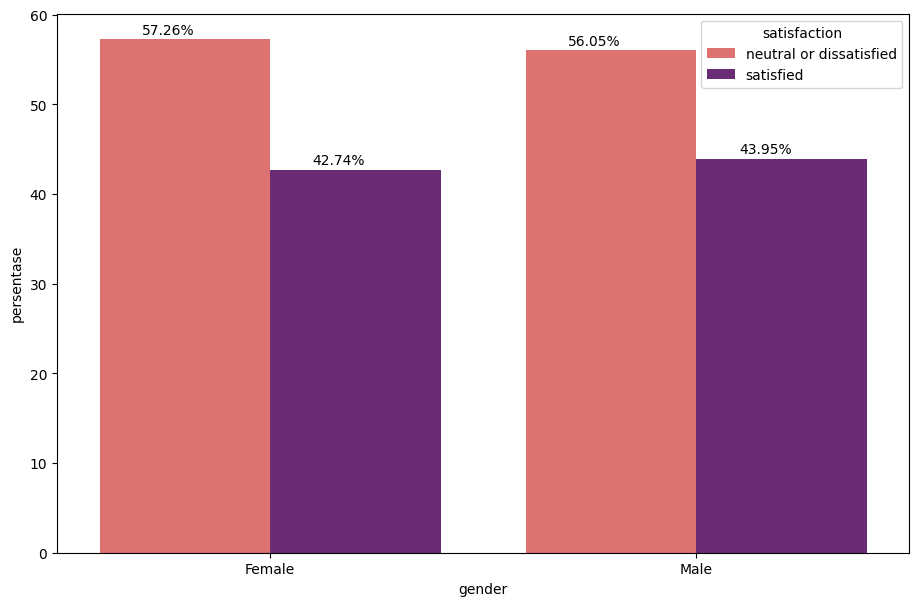

In [21]:
#In Visualization
py.figure(figsize=(11, 7))
c = sns.barplot(x='gender', y='persentase', hue='satisfaction', data=b, palette='magma_r')

for p in c.patches:
        percentage = '{:.2f}%'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.6
        c.annotate(percentage, (x, y))

### 2.8.2 Customer Type towards Satisfaction

In [22]:
d=eda.groupby(['Customer Type','satisfaction']).agg({'satisfaction':['count']}).reset_index()
d.columns=["Customer Type","satisfaction","count"]
d['amount_cust_type']=d.groupby(['Customer Type'])['count'].transform('sum')
d['persentase'] = (d['count']/ d['amount_cust_type'])*100
d

,Customer Type,satisfaction,count,amount_cust_type,persentase
0,Loyal Customer,neutral or dissatisfied,44390,84923,52.270881
1,Loyal Customer,satisfied,40533,84923,47.729119
2,disloyal Customer,neutral or dissatisfied,14489,18981,76.334229
3,disloyal Customer,satisfied,4492,18981,23.665771


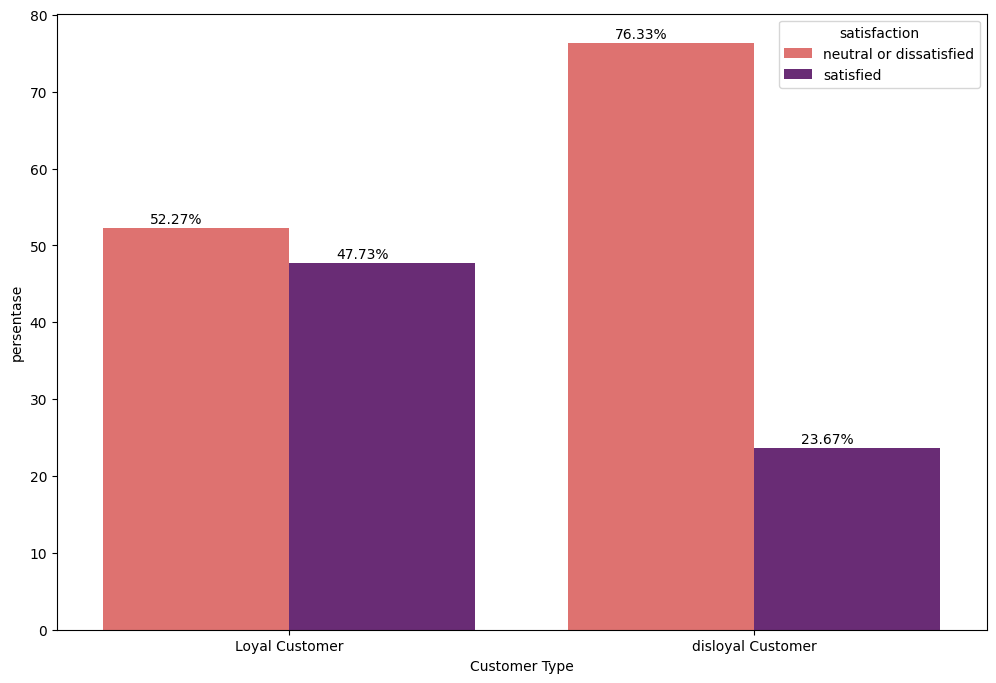

In [23]:
#In Visualization
py.figure(figsize=(12, 8))
e = sns.barplot(x='Customer Type', y='persentase', hue='satisfaction', data=d, palette='magma_r')

for p in e.patches:
        percentage = '{:.2f}%'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.6
        e.annotate(percentage, (x, y))

### 2.8.3 Type of Travel towards Satisfaction

In [24]:
f=eda.groupby(['Type of Travel','satisfaction']).agg({'satisfaction':['count']}).reset_index()
f.columns=["Type of Travel","satisfaction","count"]
f['amount_type_travel']=f.groupby(['Type of Travel'])['count'].transform('sum')
f['persentase'] = (f['count']/ f['amount_type_travel'])*100
f

,Type of Travel,satisfaction,count,amount_type_travel,persentase
0,Business travel,neutral or dissatisfied,29909,71655,41.740283
1,Business travel,satisfied,41746,71655,58.259717
2,Personal Travel,neutral or dissatisfied,28970,32249,89.832243
3,Personal Travel,satisfied,3279,32249,10.167757


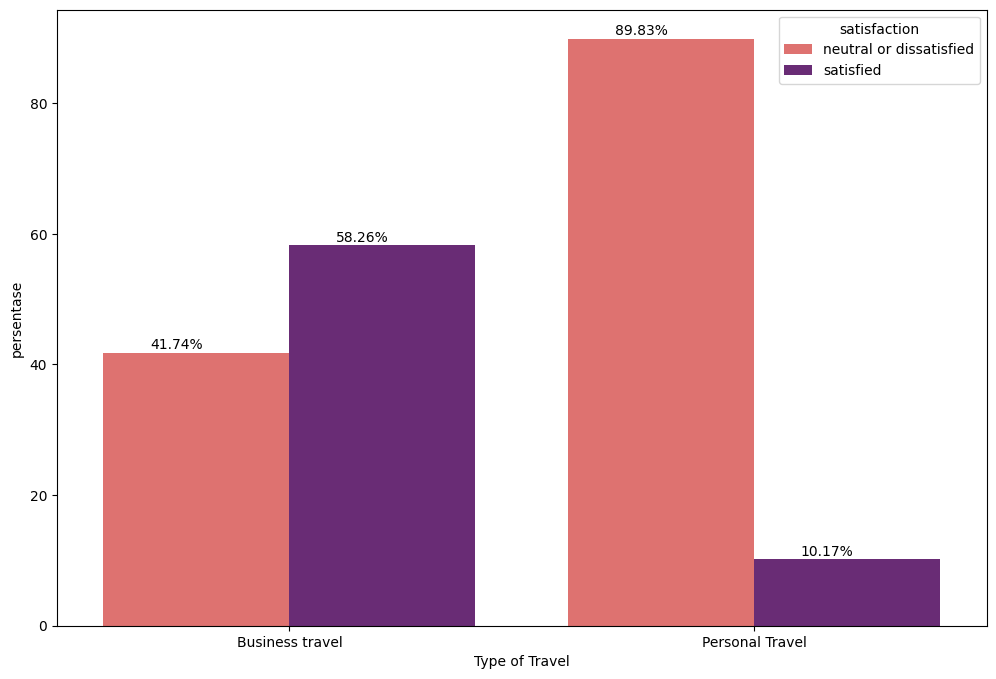

In [25]:
#In Visualization
py.figure(figsize=(12, 8))
g = sns.barplot(x='Type of Travel', y='persentase', hue='satisfaction', data=f, palette='magma_r')

for p in g.patches:
        percentage = '{:.2f}%'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.6
        g.annotate(percentage, (x, y))

### 2.8.4 Class towards Satisfaction

In [26]:
h=eda.groupby(['Class','satisfaction']).agg({'satisfaction':['count']}).reset_index()
h.columns=["Class","satisfaction","count"]
h['amount_class']=h.groupby(['Class'])['count'].transform('sum')
h['persentase'] = (h['count']/ h['amount_class'])*100
h

,Class,satisfaction,count,amount_class,persentase
0,Business,neutral or dissatisfied,15185,49665,30.574852
1,Business,satisfied,34480,49665,69.425148
2,Eco,neutral or dissatisfied,38044,46745,81.386245
3,Eco,satisfied,8701,46745,18.613755
4,Eco Plus,neutral or dissatisfied,5650,7494,75.393648
5,Eco Plus,satisfied,1844,7494,24.606352


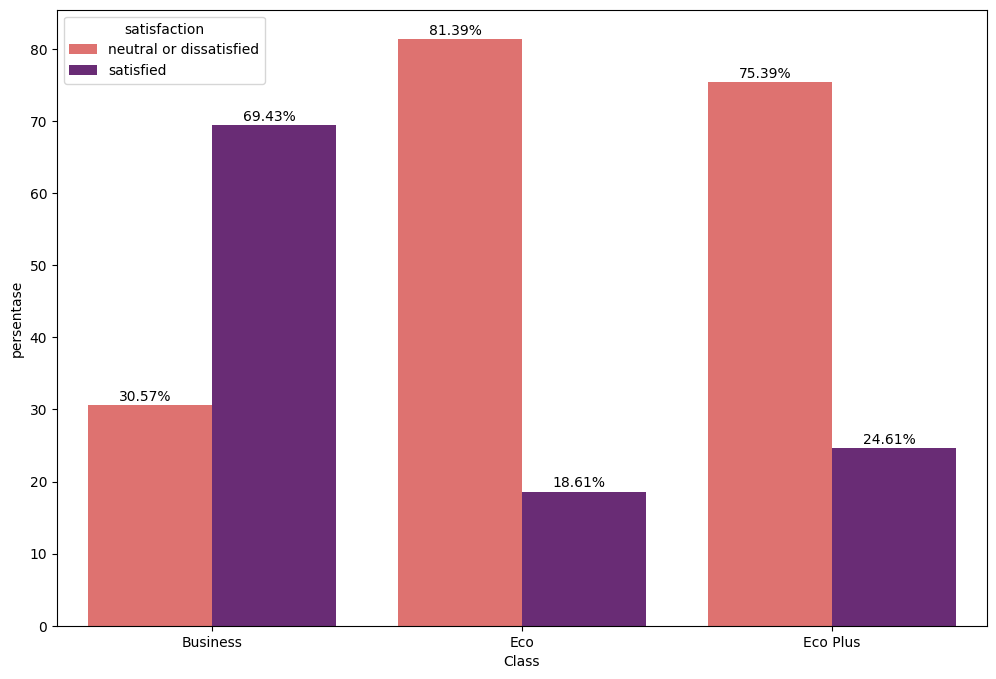

In [27]:
#In Visualization
py.figure(figsize=(12, 8))
i = sns.barplot(x='Class', y='persentase', hue='satisfaction', data=h, palette='magma_r')

for p in i.patches:
        percentage = '{:.2f}%'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 0.6
        i.annotate(percentage, (x, y))

## 2.9 Visualization - Numerical Data

## 2.10 Checking Outlier on Continue Variable Attributes

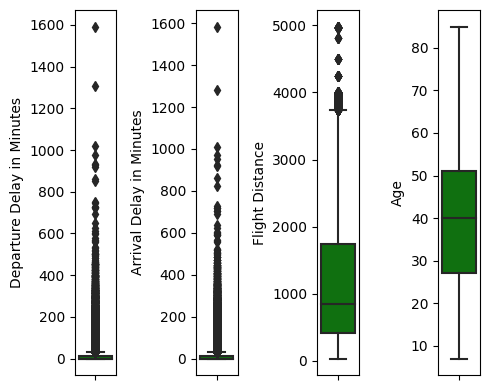

In [28]:
var_time=['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance','Age']
py.figure(figsize = (5,4))
for i in range(0, len(var_time)):
    py.subplot(1, len(var_time), i+1)
    sns.boxplot(y=eda[var_time[i]], color='green',orient='v')
    py.tight_layout()

## 2.11 Checking Feature Correlation towards Target Data

In [29]:
eda_corr = eda.copy()
eda_corr['satisfaction'].replace(['neutral or dissatisfied','satisfied'], [0,1], inplace=True)
corr=pd.DataFrame(eda_corr.corr()['satisfaction']).drop('satisfaction',axis=0).sort_values(by="satisfaction",ascending=False)
corr

,satisfaction
Online boarding,0.503557
Inflight entertainment,0.398059
Seat comfort,0.349459
On-board service,0.322383
Leg room service,0.313131
Cleanliness,0.305198
Flight Distance,0.298780
Inflight wifi service,0.284245
Baggage handling,0.247749
Inflight service,0.244741


<Axes: >

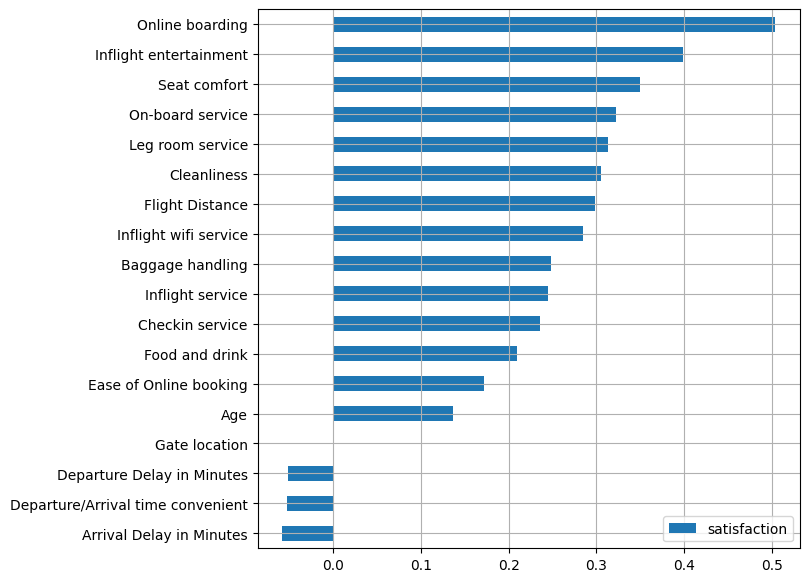

In [30]:
corr=pd.DataFrame(eda_corr.corr()['satisfaction']).drop('satisfaction',axis=0).sort_values(by="satisfaction",ascending=True)
corr.plot(kind="barh",grid=True,figsize=(7,7))

## 2.12 Age towards Satisfaction

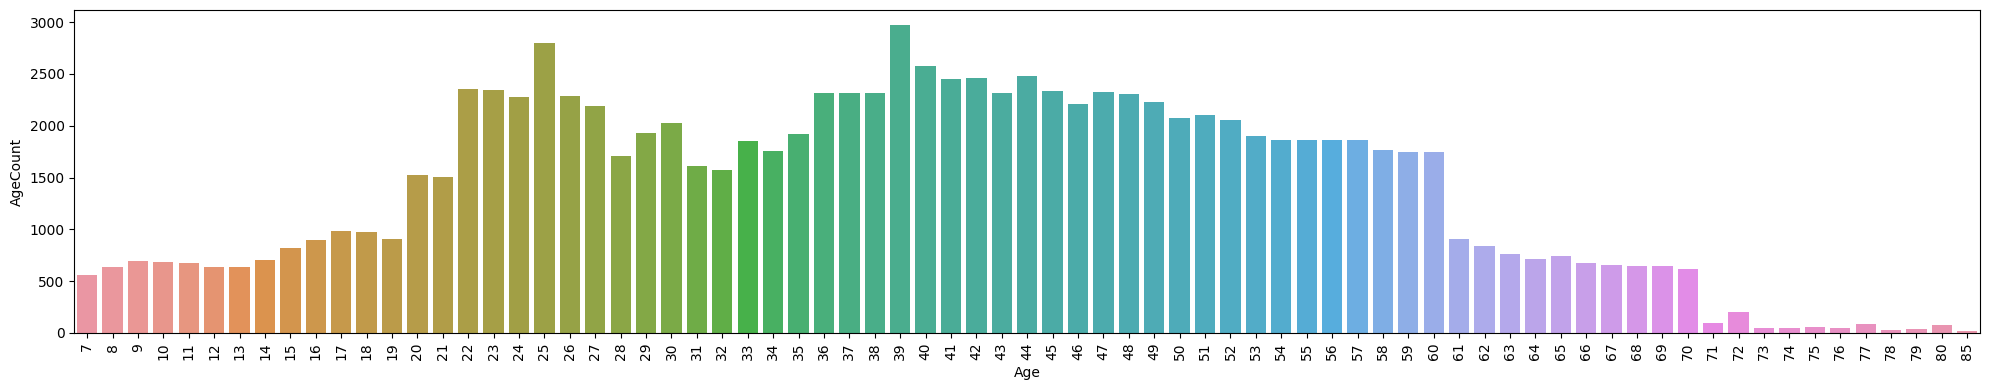

In [31]:
py.figure(figsize = (20,4))
age = eda.groupby(['Age']).agg({'satisfaction':['count']}).reset_index()
age.columns = ['Age', 'AgeCount']
g = sns.barplot(x='Age', y='AgeCount', data=age)
g.set_xticklabels(labels=age['Age'],rotation=90)
py.tight_layout()

## 2.13 Business & Eco-Eco Plus

In [32]:
eda_business=eda[eda["Class"].isin(['Business'])]
eda_eco=eda[eda["Class"].isin(['Eco','Eco Plus'])]

### 2.13.1. Business

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

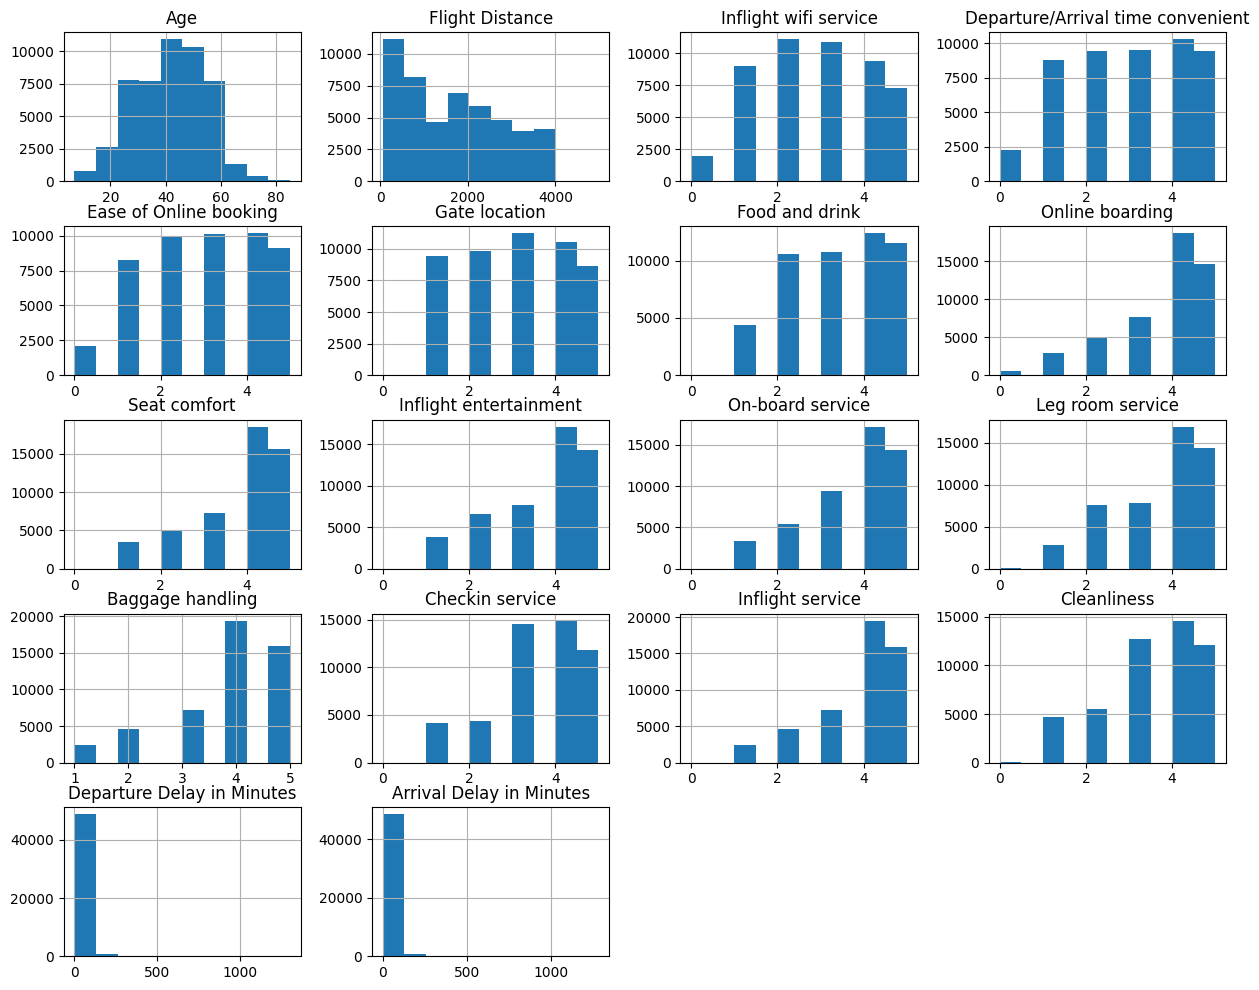

In [33]:
eda_business.hist(figsize=(15, 12))

### 2.13.2 Eco-Eco Plus

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

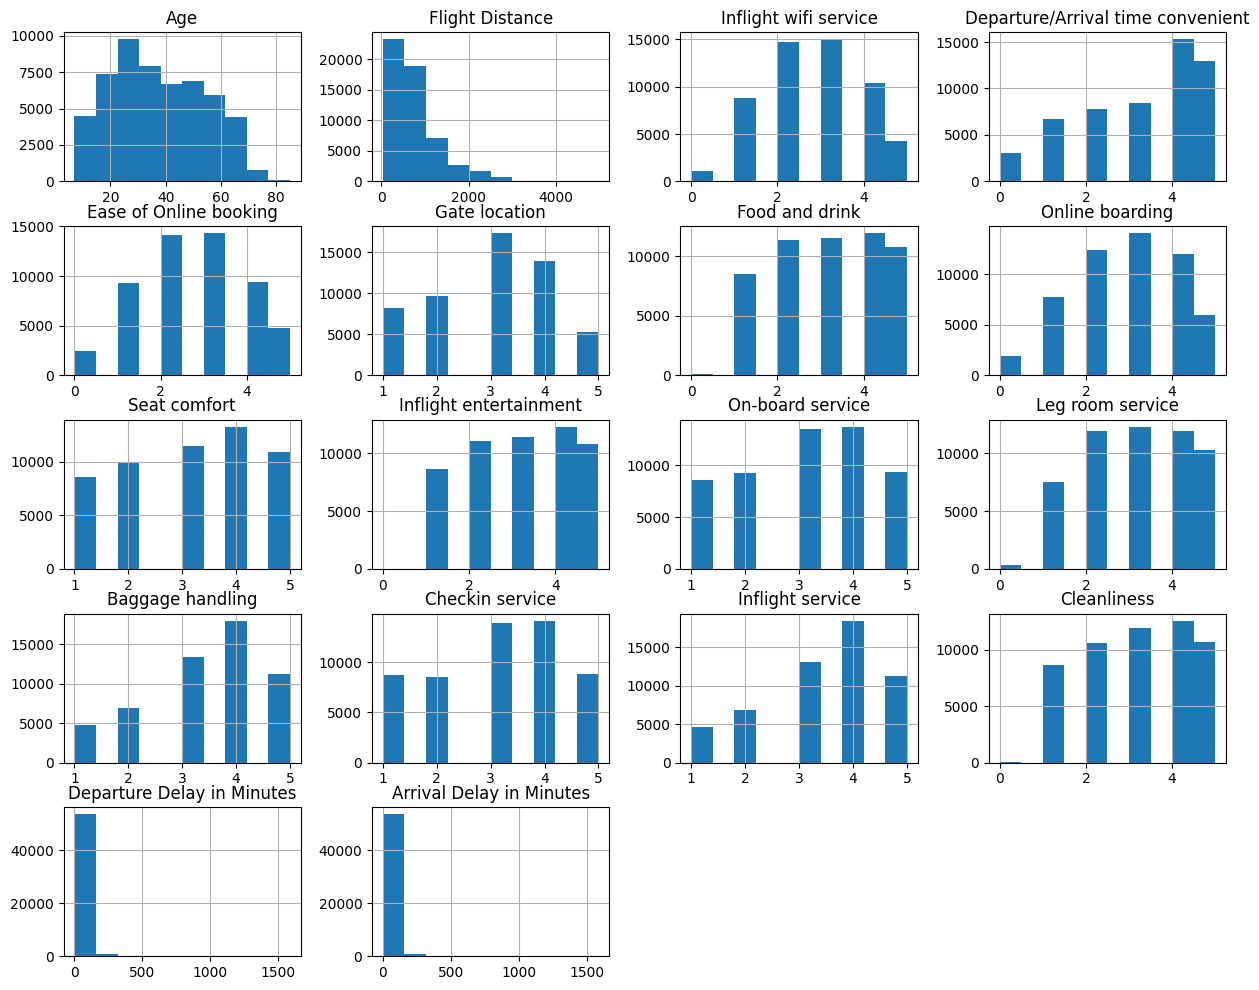

In [34]:
eda_eco.hist(figsize=(15, 12))

# 3. Data Pre-Processing

### 3.1 Splitting Training Data & Testing Data

In [35]:
process = data.copy()

In [36]:
X=process.drop(['Unnamed: 0','id','satisfaction'],axis=1)#Deleting feature Unnamed: 0, id and satisfaction(target)
y=process['satisfaction']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
#Sanity check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83123, 22)
(83123,)
(20781, 22)
(20781,)


In [39]:
#Separating numerical and categorical data type into two different variables
var_num = X_train.select_dtypes(include=['int64','float64']).columns
var_cat = X_train.select_dtypes(include=['object']).columns
df_train_num = X_train[var_num]
df_train_cat = X_train[var_cat]

## 3.2 Data Pre-Processing (Training Data)

### 3.2.1 Replacing the Null Values

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(df_train_num)
imputed_data=imputer.transform(df_train_num)
X_train_num_imputed = pd.DataFrame(imputed_data)
X_train_num_imputed.columns = df_train_num.columns
X_train_num_imputed.index = df_train_num.index

In [41]:
#Re-checking after imputation
X_train_num_imputed.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### 3.3.2 Feature Engineering

In [42]:
df_encode=pd.get_dummies(df_train_cat)
ohe_columns=df_encode.columns

### 3.2.3 Joining Data After Pre-Processing

In [43]:
df_train_concat = pd.concat([X_train_num_imputed,df_encode],axis=1)
df_train_concat.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                

### 3.2.4 Standardizing Data

In [44]:
from sklearn.preprocessing import StandardScaler

#Made function
def standardizerData(data):
    """
    Function for data standardization
    :param data: data that will be processed
    :return standardized_data: data after processed
    :return standardizer: method for standardizer data
    """
    data_columns = data.columns  # save the column name
    data_index = data.index  # save the index

    # Fit of standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # Data transform
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [45]:
X_train_clean, standardizer = standardizerData(data = df_train_concat)

#### 3.2.4.1 Visualization of Data Distribution After Standardizing

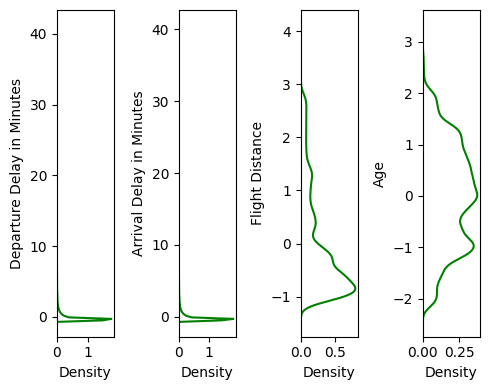

In [46]:
var_time=['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance','Age']
py.figure(figsize = (5,4))
for i in range(0, len(var_time)):
    py.subplot(1, len(var_time), i+1)
    sns.kdeplot(y=X_train_clean[var_time[i]], color='green')
    py.tight_layout()

### 3.2.5 Checking Proportion of Data Target

In [47]:
y_train.value_counts()

neutral or dissatisfied    47166
satisfied                  35957
Name: satisfaction, dtype: int64

In [48]:
y_train.value_counts(normalize=True)

neutral or dissatisfied    0.567424
satisfied                  0.432576
Name: satisfaction, dtype: float64

### 3.2.6 Handling Imbalance Data

In [49]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy="minority", random_state=42)
X_train_clean, y_train = smt.fit_resample(X_train_clean, y_train)

In [50]:
y_train.value_counts()

neutral or dissatisfied    47166
satisfied                  47166
Name: satisfaction, dtype: int64

In [51]:
y_train.value_counts(normalize=True)

neutral or dissatisfied    0.5
satisfied                  0.5
Name: satisfaction, dtype: float64

# 4. Modelling Process

## 4.1 Converting Data Target

In [52]:
y_train.value_counts(normalize = True)

neutral or dissatisfied    0.5
satisfied                  0.5
Name: satisfaction, dtype: float64

In [53]:
y_train.replace(["satisfied","neutral or dissatisfied"], [0,1], inplace=True)

In [54]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: satisfaction, dtype: float64

## 4.2 Logistic Regression

### 4.2.1 Fitting Model

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_clean, y_train)

LogisticRegression(random_state=42)

### 4.2.2 Prediction

In [56]:
y_pred_logreg=logreg.predict(X_train_clean)
y_pred_logreg

array([1, 1, 1, ..., 1, 0, 0])

### 4.2.3 Evaluation

In [57]:
benchmark = data['satisfaction'].value_counts(normalize=True)
benchmark

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [58]:
print(classification_report(y_train, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     47166
           1       0.86      0.88      0.87     47166

    accuracy                           0.87     94332
   macro avg       0.87      0.87      0.87     94332
weighted avg       0.87      0.87      0.87     94332



## 4.3 KNN

### 4.3.1 Fitting Model


In [59]:
from sklearn.neighbors import KNeighborsClassifier
# Model K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

### 4.3.2 Prediction

In [60]:
y_pred_knn=knn.predict(X_train_clean)
y_pred_knn

array([1, 0, 1, ..., 0, 0, 0])

### 4.3.3 Model Evaluation


In [61]:
benchmark = data['satisfaction'].value_counts(normalize=True)
benchmark

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [62]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     47166
           1       0.95      0.96      0.96     47166

    accuracy                           0.96     94332
   macro avg       0.96      0.96      0.96     94332
weighted avg       0.96      0.96      0.96     94332



## 4.4 Decision Tree

### 4.4.1 Calculating Information Gain

In [63]:
process_ig=data.copy()

In [64]:
process_ig['Inflight wifi service'].replace([0,1,2,3,4,5], ['0-iw','1-iw','2-iw','3-iw','4-iw','5-iw'], inplace=True)
process_ig['Departure/Arrival time convenient'].replace([0,1,2,3,4,5], ['0-da','1-da','2-da','3-da','4-da','5-da'], inplace=True)
process_ig['Gate location'].replace([0,1,2,3,4,5], ['0-gl','1-gl','2-gl','3-gl','4-gl','5-gl'], inplace=True)
process_ig['Food and drink'].replace([0,1,2,3,4,5], ['0-fd','1-fd','2-fd','3-fd','4-fd','5-fd'], inplace=True)
process_ig['Online boarding'].replace([0,1,2,3,4,5], ['0-ob','1-ob','2-ob','3-ob','4-ob','5-ob'], inplace=True)
process_ig['Seat comfort'].replace([0,1,2,3,4,5], ['0-sc','1-sc','2-sc','3-sc','4-sc','5-sc'], inplace=True)
process_ig['Inflight entertainment'].replace([0,1,2,3,4,5], ['0-ie','1-ie','2-ie','3-ie','4-ie','5-ie'], inplace=True)
process_ig['On-board service'].replace([0,1,2,3,4,5], ['0-obs','1-obs','2-obs','3-obs','4-obs','5-obs'], inplace=True)
process_ig['Leg room service'].replace([0,1,2,3,4,5], ['0-lrs','1-lrs','2-lrs','3lrs','4lrs','5lrs'], inplace=True)
process_ig['Baggage handling'].replace([0,1,2,3,4,5], ['0-bh','1-bh','2-bh','3-bh','4-bh','5-bh'], inplace=True)
process_ig['Checkin service'].replace([0,1,2,3,4,5], ['0-cs','1-cs','2-cs','3-cs','4-cs','5-cs'], inplace=True)
process_ig['Inflight service'].replace([0,1,2,3,4,5], ['0-is','1-is','2-is','3-is','4-is','5-is'], inplace=True)
process_ig['Cleanliness'].replace([0,1,2,3,4,5], ['0-cl','1-cl','2-cl','3-cl','4-cl','5-cl'], inplace=True)

In [65]:
IG_columns = process_ig.drop(columns=['Unnamed: 0','id','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Age','satisfaction'],axis=1).columns

In [66]:
#Proportion of target
target = process_ig.groupby(['satisfaction']).agg({'satisfaction':['count']}).reset_index()
target.columns = ['satisfaction','amount']
target

,satisfaction,amount
0,neutral or dissatisfied,58879
1,satisfied,45025


In [67]:
#Calculating Entropy Parents
target = process_ig.groupby(['satisfaction']).agg({'satisfaction':['count']}).reset_index()
target.columns = ['satisfaction','amount']
target['total_target']=target['amount'].sum()
target['prob_ef']=target['amount']/target['total_target']
target['pi_log_ef']=target['prob_ef']*np.log2(target['prob_ef'])
target['entropy_parents']=target.groupby(['total_target'])['pi_log_ef'].transform('sum')*(-1)
target

,satisfaction,amount,total_target,prob_ef,pi_log_ef,entropy_parents
0,neutral or dissatisfied,58879,103904,0.566667,-0.464342,0.987138
1,satisfied,45025,103904,0.433333,-0.522796,0.987138


In [68]:
#Creating function to calculating Information Gain (IG)
def concat(data,var):
  entropy_parents=0.987138
  c=[]
  b=pd.DataFrame()
  for i in var:
    a=data.groupby([i,'satisfaction']).agg({'satisfaction':['count']}).reset_index()
    a.columns=['element_of_feature','satisfaction','count']
    b=pd.concat([b,a],axis=0)
    del a
  for k in b['element_of_feature']:
    for l in IG_columns:
      if k in process_ig[l].unique():
        c.append(l)
  b.insert(loc = 0,
          column = 'feature',
          value = c)
  b['total_pass_el_feature']=b.groupby(['element_of_feature'])['count'].transform('sum')
  b['total_pass_feature']=b.groupby(['feature'])['count'].transform('sum')
  b['prob_ef']=b['count']/b['total_pass_el_feature']
  b['pi_log_ef']=b['prob_ef']*np.log2(b['prob_ef'])
  b['entropy_ef']=b.groupby(['element_of_feature'])['pi_log_ef'].transform('sum')*(-1)
  b['prob_f']=b['count']/b['total_pass_feature']
  b['pi_log_f']=b['prob_f']*b['entropy_ef']
  b['entropy_f']=b.groupby(['feature'])['pi_log_f'].transform('sum')
  b['information_gain']=entropy_parents-b['entropy_f']
  b.drop_duplicates(subset="feature",
                     keep="first", inplace=True)
  b.sort_values(by="information_gain",inplace=True,ascending=True)
  return b


<Axes: ylabel='feature'>

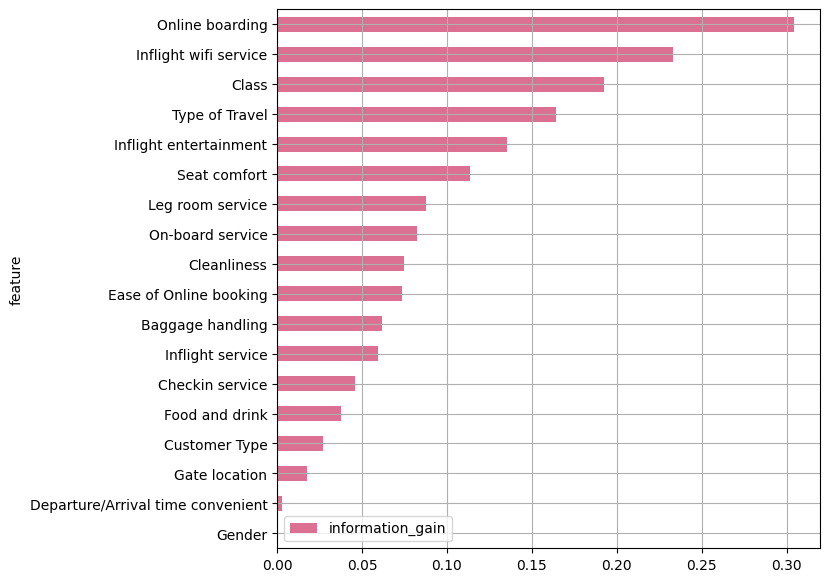

In [69]:
h=concat(process_ig,IG_columns).set_index("feature")[['information_gain']]
h.plot(kind="barh",grid=True,figsize=(7,7), color="palevioletred")

### 4.4.2 Fitting Model

In [70]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=42)

### 4.4.3 Prediction

In [71]:
y_pred_dec_tree=dec_tree.predict(X_train_clean)
y_pred_dec_tree

array([1, 1, 1, ..., 0, 0, 0])

### 4.4.4 Model Evaluation


In [72]:
benchmark = data['satisfaction'].value_counts(normalize=True)
benchmark

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [73]:
print(classification_report(y_train, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47166
           1       1.00      1.00      1.00     47166

    accuracy                           1.00     94332
   macro avg       1.00      1.00      1.00     94332
weighted avg       1.00      1.00      1.00     94332



### 4.4.5 Handling Overfitting

#### A. Fitting & Prediction

In [74]:
#Handling overfiting model with arrange the amount of tree's max_depth
from sklearn.tree import DecisionTreeClassifier
dec_tree_tun = DecisionTreeClassifier(max_depth=15, random_state = 42)
dec_tree_tun.fit(X_train_clean, y_train)

y_pred_dec_tree_tun=dec_tree_tun.predict(X_train_clean)
y_pred_dec_tree_tun

array([1, 1, 1, ..., 0, 0, 0])

#### B. Evaluation

In [75]:
print(classification_report(y_train, y_pred_dec_tree_tun))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     47166
           1       0.96      0.99      0.97     47166

    accuracy                           0.97     94332
   macro avg       0.97      0.97      0.97     94332
weighted avg       0.97      0.97      0.97     94332



#### C. Tree Visualization

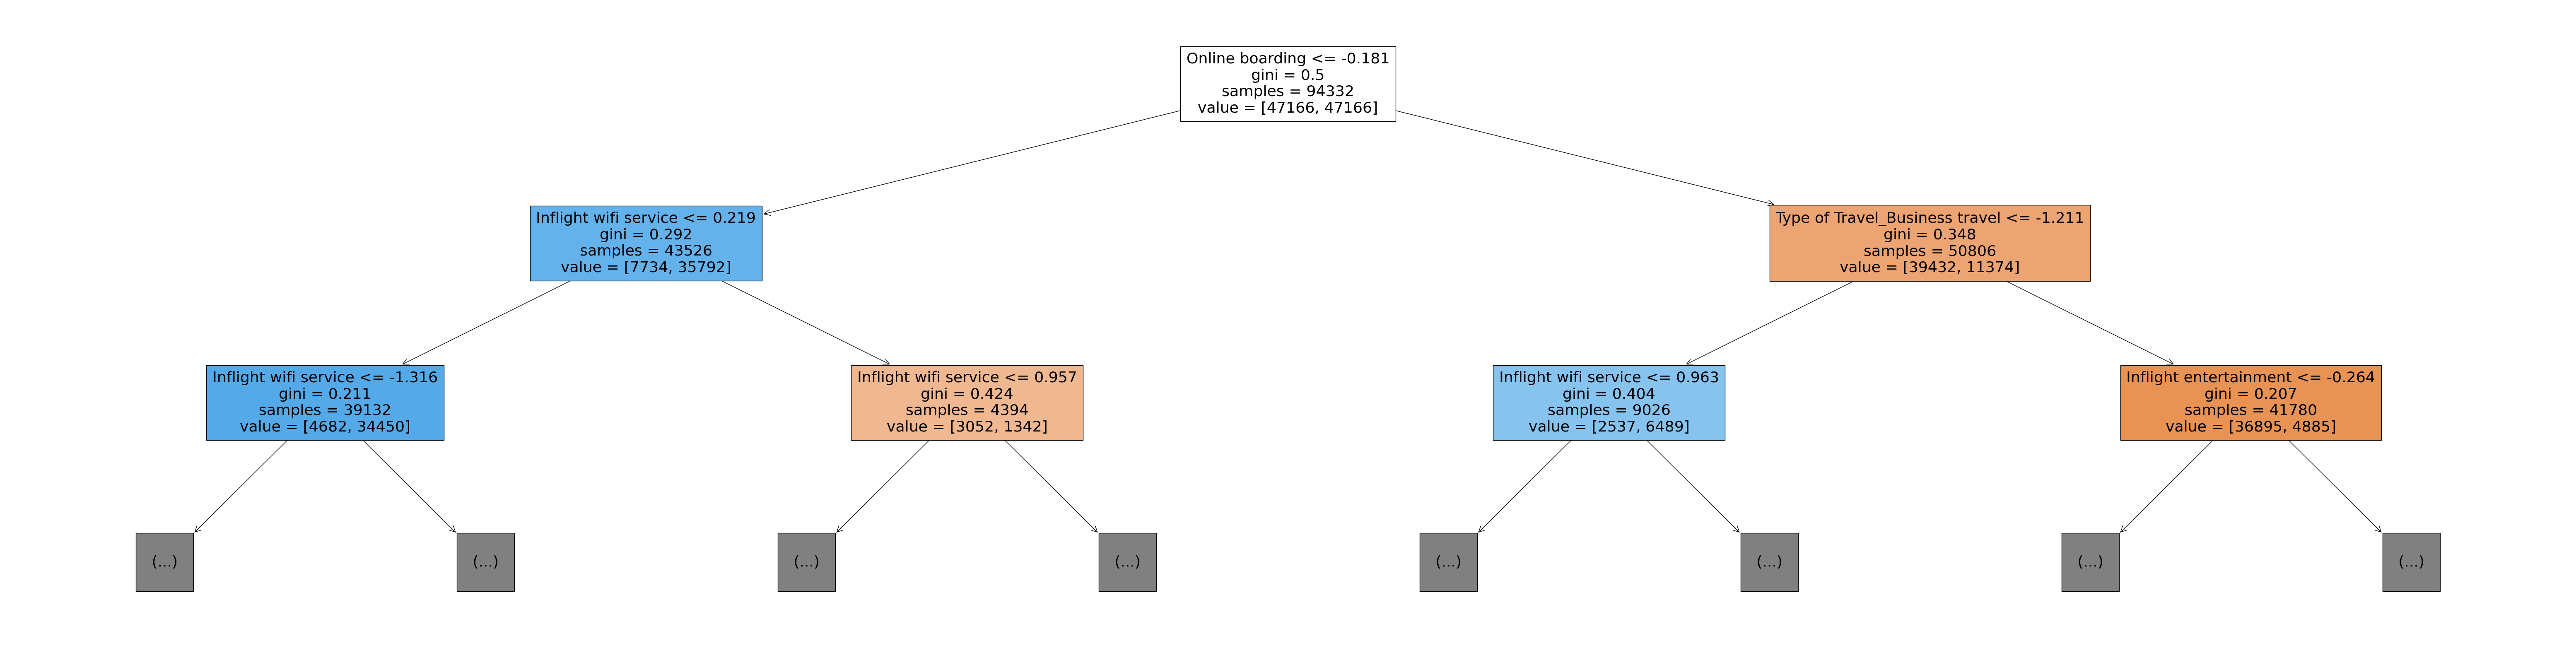

In [76]:
#Trying to Plot Tree Visualization
from sklearn.tree import plot_tree, export_text
py.figure(figsize =(80,20))

plot_tree(dec_tree, feature_names=X_train_clean.columns, max_depth=2, filled=True);

# 5. Data Testing Pre-Processing

In [77]:
def extractTest(data,
                numerical_column, categorical_column,
                imputer_numerical, standardizer):
    """
    Fungsi untuk mengekstrak & membersihkan test data
    :param data: <pandas dataframe> sampel data test
    :param numerical_column: <list> kolom numerik
    :param categorical_column: <list> kolom kategorik
    :param imputer_numerical: <sklearn method> imputer data numerik
    :param standardizer: <sklearn method> standardizer data
    :return cleaned_data: <pandas dataframe> data final
    """
    # Data filtering
    numerical_data = data[numerical_column]
    categorical_data = data[categorical_column]

    # Numerical data processing
    numerical_data = pd.DataFrame(imputer_numerical.transform(numerical_data))
    numerical_data.columns = numerical_column
    numerical_data.index = data.index

    # Categoric data processing
    categorical_data=pd.get_dummies(categorical_data)
    categorical_data.reindex(index = categorical_data.index,
                             columns = ohe_columns)

    # Joining data data
    concat_data = pd.concat([numerical_data, categorical_data],
                             axis = 1)
    cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
    cleaned_data.columns = concat_data.columns

    return cleaned_data


In [78]:
X_test_clean = extractTest(data = X_test,
                           numerical_column = var_num,
                           categorical_column = var_cat,
                           imputer_numerical = imputer,
                           standardizer = standardizer)

# 6. Testing

## 6.1 Prediction & Evaluation

### 6.1.1 Converting Data Target

In [79]:
y_test.value_counts(normalize = True)

neutral or dissatisfied    0.56364
satisfied                  0.43636
Name: satisfaction, dtype: float64

In [80]:
y_test.replace(["satisfied","neutral or dissatisfied"], [0,1], inplace=True)

In [81]:
y_test.value_counts(normalize = True)

1    0.56364
0    0.43636
Name: satisfaction, dtype: float64

### 6.1.2 Creating Function to Visualize Confusion Matrix

In [82]:
from sklearn import metrics
def viz_cm(actual, predicted):
  con_mat = metrics.confusion_matrix(actual, predicted)
  con_mat_viz = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = [False, True])
  con_mat_viz.plot(values_format="d")
  py.xlabel("Predicted Label")
  py.ylabel("True Label")
  py.show()

### 6.1.3 Logistic Regression

In [83]:
test_predict_logreg = logreg.predict(X_test_clean)

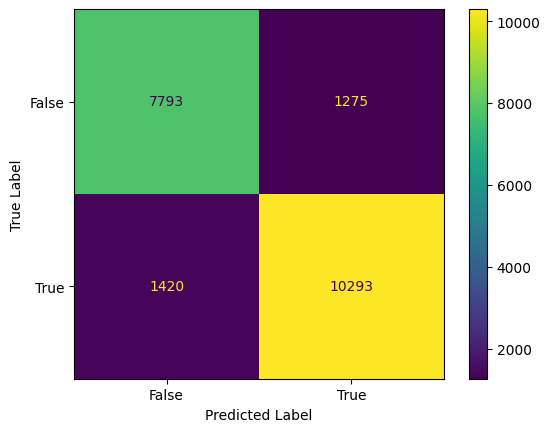

In [84]:
viz_cm(y_test, test_predict_logreg)

In [85]:
print(classification_report(y_test, test_predict_logreg))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      9068
           1       0.89      0.88      0.88     11713

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781



### 6.1.4 KNN

In [86]:
test_predict_knn = knn.predict(X_test_clean)

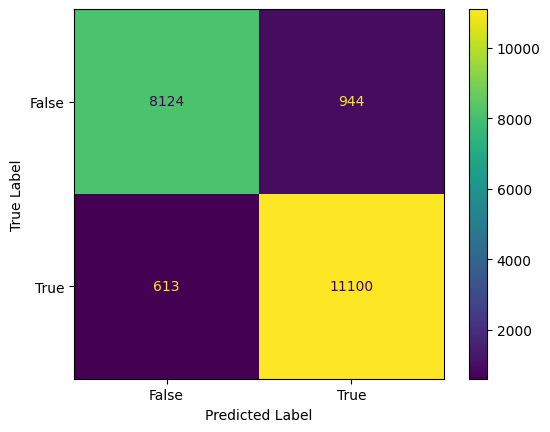

In [87]:
viz_cm(y_test, test_predict_knn)

In [88]:
print(classification_report(y_test, test_predict_knn))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      9068
           1       0.92      0.95      0.93     11713

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.92     20781



### 6.1.5 Decision Tree

In [89]:
test_predict_tree = dec_tree_tun.predict(X_test_clean)

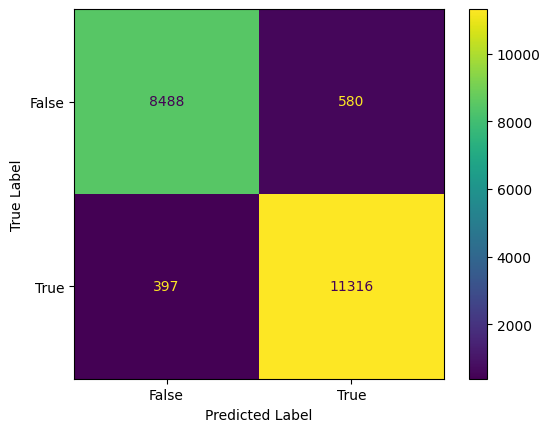

In [90]:
viz_cm(y_test, test_predict_tree)

In [91]:
print(classification_report(y_test, test_predict_tree))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9068
           1       0.95      0.97      0.96     11713

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

